# FUENTE DE LOS DATOS: https://power.larc.nasa.gov/data-access-viewer/

In [3]:
# Importar las librerías básicas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# PREPROCESADO Y ANÁLISIS

## 1- Importar el dataset y darle la forma deseada. Nos quedaremos con mes, temp máx y temp mín

In [4]:
dataset = pd.read_csv("Datos_Benito_Villamarin.csv", sep = ';')
dataset

,YEAR,MO,DY,T2M_MAX,T2M_MIN,PRECTOTCORR,PS
0,1983,1,1,14.24,0.69,0.00,100.87
1,1983,1,2,13.11,-1.12,0.00,101.00
2,1983,1,3,13.94,0.01,0.00,101.14
3,1983,1,4,16.24,0.91,0.00,101.23
4,1983,1,5,17.07,3.06,0.00,101.09
...,...,...,...,...,...,...,...
14606,2022,12,28,19.92,7.19,0.00,100.36
14607,2022,12,29,17.58,7.56,0.03,100.32
14608,2022,12,30,18.35,8.64,0.12,100.39
14609,2022,12,31,17.90,4.55,0.00,100.30


In [5]:
dataset = dataset.iloc[:, [0, 1, 2, 3, 4]]
dataset

,YEAR,MO,DY,T2M_MAX,T2M_MIN
0,1983,1,1,14.24,0.69
1,1983,1,2,13.11,-1.12
2,1983,1,3,13.94,0.01
3,1983,1,4,16.24,0.91
4,1983,1,5,17.07,3.06
...,...,...,...,...,...
14606,2022,12,28,19.92,7.19
14607,2022,12,29,17.58,7.56
14608,2022,12,30,18.35,8.64
14609,2022,12,31,17.90,4.55


In [6]:
dataset["DATE"] = pd.to_datetime(dataset["YEAR"].astype(str) + "-" + 
                                  dataset["MO"].astype(str) + "-" + 
                                  dataset["DY"].astype(str), 
                                  format="%Y-%m-%d").dt.date

dataset.insert(0, "DATE", dataset.pop("DATE"))
dataset

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10492\361551939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["DATE"] = pd.to_datetime(dataset["YEAR"].astype(str) + "-" +


,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
0,1983-01-01,1983,1,1,14.24,0.69
1,1983-01-02,1983,1,2,13.11,-1.12
2,1983-01-03,1983,1,3,13.94,0.01
3,1983-01-04,1983,1,4,16.24,0.91
4,1983-01-05,1983,1,5,17.07,3.06
...,...,...,...,...,...,...
14606,2022-12-28,2022,12,28,19.92,7.19
14607,2022-12-29,2022,12,29,17.58,7.56
14608,2022-12-30,2022,12,30,18.35,8.64
14609,2022-12-31,2022,12,31,17.90,4.55


## 2- Análisis previo del dataset

In [7]:
dataset.dtypes

DATE        object
YEAR         int64
MO           int64
DY           int64
T2M_MAX    float64
T2M_MIN    float64
dtype: object

In [8]:
dataset.isna().any().any() # No hay valores nulos

False

In [9]:
dataset.describe()

,YEAR,MO,DY,T2M_MAX,T2M_MIN
count,14611.000000,14611.000000,14611.000000,14611.000000,14611.000000
mean,2002.501061,6.522552,15.728629,24.897223,11.481236
std,11.544613,3.449006,8.800936,16.996523,15.758233
min,1983.000000,1.000000,1.000000,-999.000000,-999.000000
25%,1992.500000,4.000000,8.000000,17.640000,6.660000
50%,2003.000000,7.000000,16.000000,23.660000,11.150000
75%,2012.500000,10.000000,23.000000,32.680000,17.080000
max,2023.000000,12.000000,31.000000,46.260000,28.270000


<AxesSubplot: xlabel='T2M_MAX'>

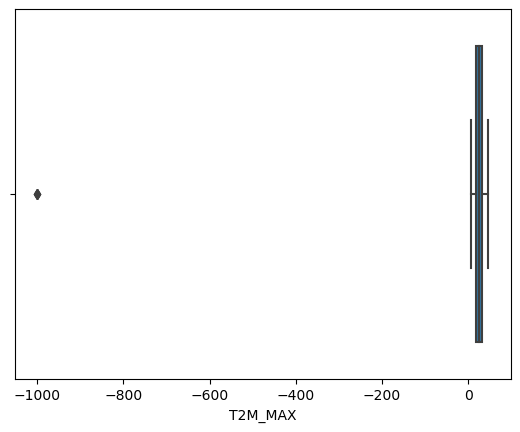

In [10]:
sns.boxplot(x=dataset["T2M_MAX"]) # Hay un valor atípico

<AxesSubplot: xlabel='T2M_MIN'>

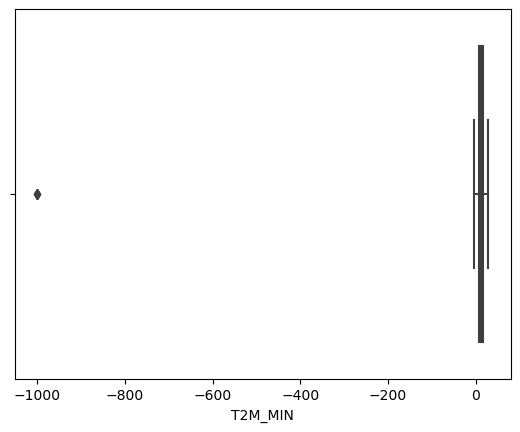

In [11]:
sns.boxplot(x=dataset["T2M_MIN"]) # Hay un valor atípico

### Calcular los límites de los valores atípicos en la temperatura máxima

In [12]:
q1 = np.percentile(dataset["T2M_MAX"], 25)
q3 = np.percentile(dataset["T2M_MAX"], 75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

##### Identificar el valor atípico

In [13]:
outliers = dataset[(dataset["T2M_MAX"] < lower_limit) | (dataset["T2M_MAX"] > upper_limit)]
outliers # Los valores atípicos están los 3 juntos en las filas 14566, 14567 y 14568

,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
14566,2022-11-18,2022,11,18,-999.0,-999.0
14567,2022-11-19,2022,11,19,-999.0,-999.0
14568,2022-11-20,2022,11,20,-999.0,-999.0


##### Interpolar linealmente para sustituir estos 3 valores atípicos

In [14]:
first = dataset.iloc[14565, :]['T2M_MAX']
last = dataset.iloc[14569, :]['T2M_MAX']

for i in range(1,4):
    dataset.loc[14565 + i, 'T2M_MAX'] = first + (i/4)*(last - first)

<AxesSubplot: xlabel='T2M_MAX'>

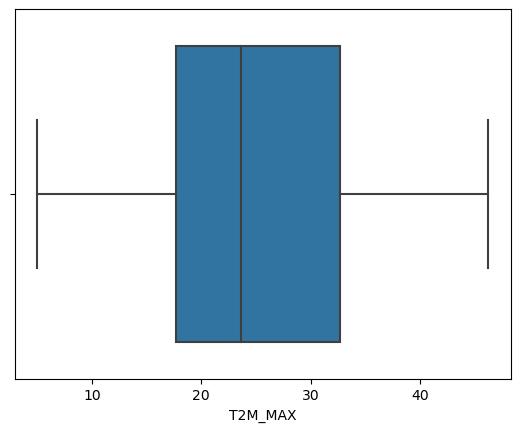

In [15]:
sns.boxplot(x=dataset["T2M_MAX"]) # Ya no hay valores atípicos en la temperatura máxima

### Calcular los límites de los valores atípicos en la temperatura mínima

In [16]:
q1 = np.percentile(dataset["T2M_MIN"], 25)
q3 = np.percentile(dataset["T2M_MIN"], 75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

##### Identificar el valor atípico

In [17]:
outliers = dataset[(dataset["T2M_MIN"] < lower_limit) | (dataset["T2M_MIN"] > upper_limit)]
outliers # Los valores atípicos están también los 3 juntos en las filas 14566, 14567 y 14568

,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
14566,2022-11-18,2022,11,18,22.055,-999.0
14567,2022-11-19,2022,11,19,21.620,-999.0
14568,2022-11-20,2022,11,20,21.185,-999.0


##### Interpolar linealmente para sustituir estos 3 valores atípicos

In [18]:
first = dataset.iloc[14565, :]['T2M_MIN']
last = dataset.iloc[14569, :]['T2M_MIN']

for i in range(1,4):
    dataset.loc[14565 + i, 'T2M_MIN'] = first + (i/4)*(last - first)

<AxesSubplot: xlabel='T2M_MIN'>

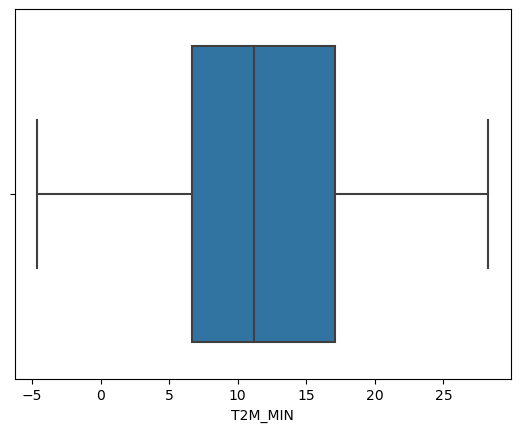

In [19]:
sns.boxplot(x=dataset["T2M_MIN"]) # Ya no hay valores atípicos en la temperatura mínima

## 3- Representación y análisis de las series temporales

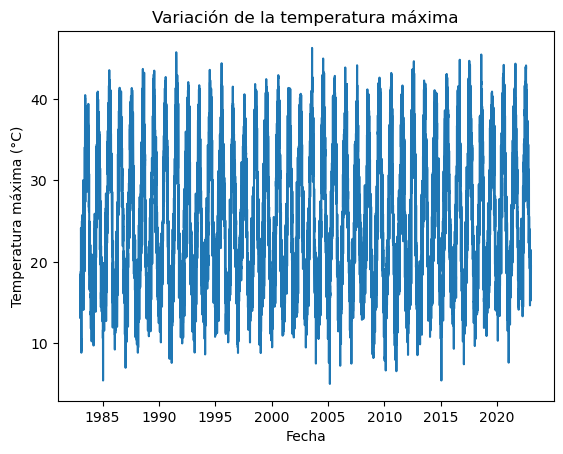

In [20]:
plt.plot(dataset['DATE'], dataset['T2M_MAX'])
plt.title('Variación de la temperatura máxima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura máxima (°C)')
plt.show()

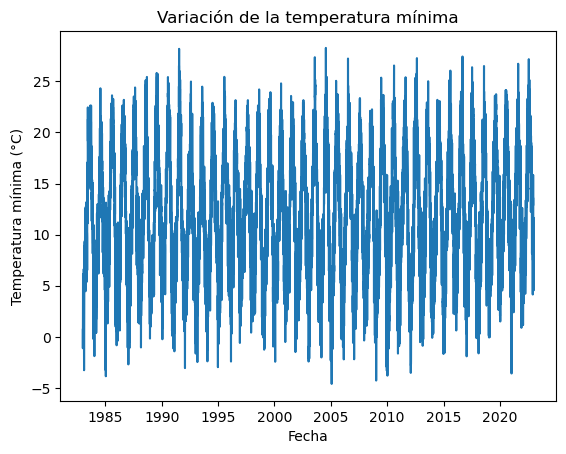

In [21]:
plt.plot(dataset['DATE'], dataset['T2M_MIN'])
plt.title('Variación de la temperatura mínima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura mínima (°C)')
plt.show()

##### Descomponer la serie temperatura máxima en sus componentes de tendencia, estacionalidad y ruido

In [22]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(dataset['T2M_MAX'], model='additive', period=365)

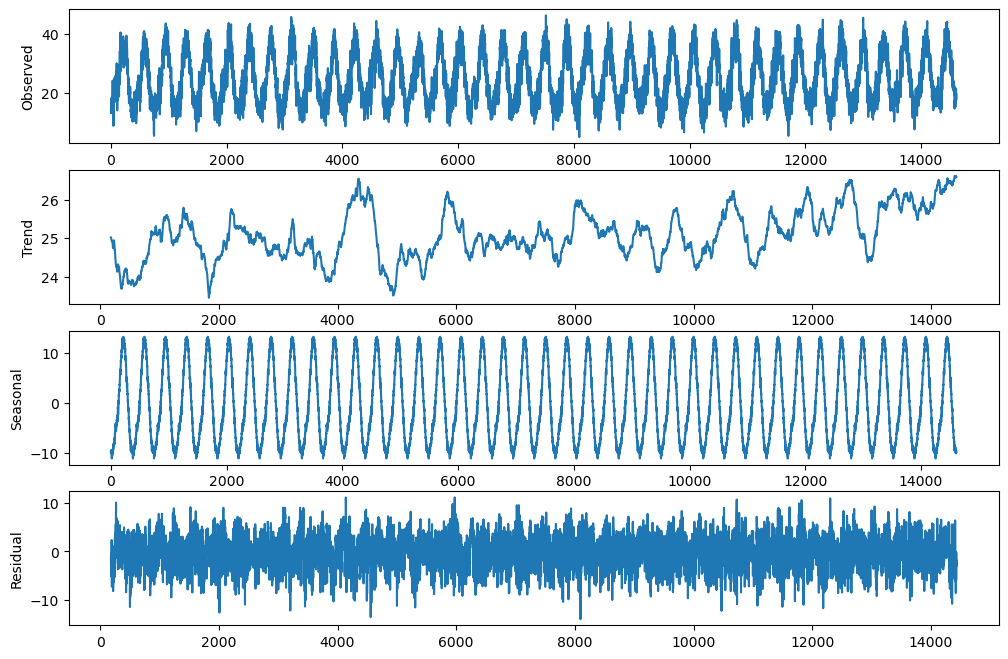

In [23]:
fig, ax = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')
decomposition.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')
plt.show() # Parece estacionaria, aunque quizás con una ligera tendencia creciente

##### Análisis de correlación

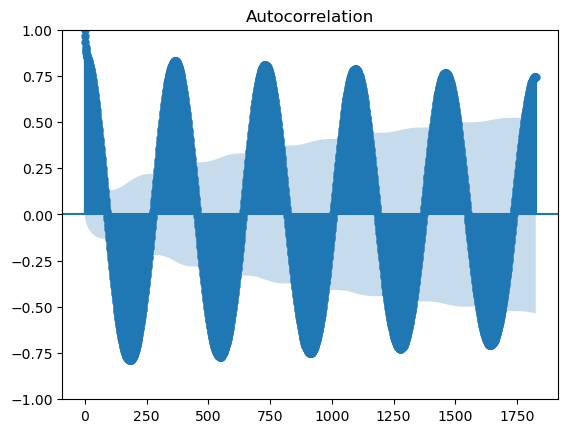

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataset["T2M_MAX"].values, lags = 365*5) #¿Parece estacionaria no?
plt.show()

# PREPROCESADO PARA LOS MODELOS

## 1- Separación de datos de entrenamiento y de test

In [25]:
dataset_training = dataset[dataset["YEAR"]< 2020]
dataset_training

,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
0,1983-01-01,1983,1,1,14.24,0.69
1,1983-01-02,1983,1,2,13.11,-1.12
2,1983-01-03,1983,1,3,13.94,0.01
3,1983-01-04,1983,1,4,16.24,0.91
4,1983-01-05,1983,1,5,17.07,3.06
...,...,...,...,...,...,...
13509,2019-12-27,2019,12,27,19.22,7.76
13510,2019-12-28,2019,12,28,19.85,7.19
13511,2019-12-29,2019,12,29,18.30,6.23
13512,2019-12-30,2019,12,30,16.56,4.56


In [26]:
dataset_test = dataset[dataset["YEAR"] >= 2020]
dataset_test

,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
13514,2020-01-01,2020,1,1,16.14,4.26
13515,2020-01-02,2020,1,2,15.90,3.82
13516,2020-01-03,2020,1,3,15.13,4.83
13517,2020-01-04,2020,1,4,14.34,2.05
13518,2020-01-05,2020,1,5,16.06,5.30
...,...,...,...,...,...,...
14606,2022-12-28,2022,12,28,19.92,7.19
14607,2022-12-29,2022,12,29,17.58,7.56
14608,2022-12-30,2022,12,30,18.35,8.64
14609,2022-12-31,2022,12,31,17.90,4.55


In [27]:
training_set = dataset_training.iloc[:, [2,4,5]].values # Mes, temp. máxima y temp. mínima de los datos de entrenamiento
training_dates = dataset_training.iloc[:, 0].values # Fechas de los datos de entrenamiento
real_values = dataset_test.iloc[:, [4]].values # Temperatura máxima de los datos de test
forecast_dates = dataset_test.iloc[:, 0].values # Fechas de los datos de test, que serán también las de las predicciones

## 2- Escalado de los datos

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(training_set)
training_set_scaled = scaler.transform(training_set)

## 3- Creación de la estructura de datos

In [29]:
X_train = []
y_train = []
n_future = 1   # Número de días en el futuro que queremos predecir
n_past = 90  # Número de días anteriores que usamos para predecir

In [30]:
for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, :])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 1])

X_train, y_train = np.array(X_train), np.array(y_train)

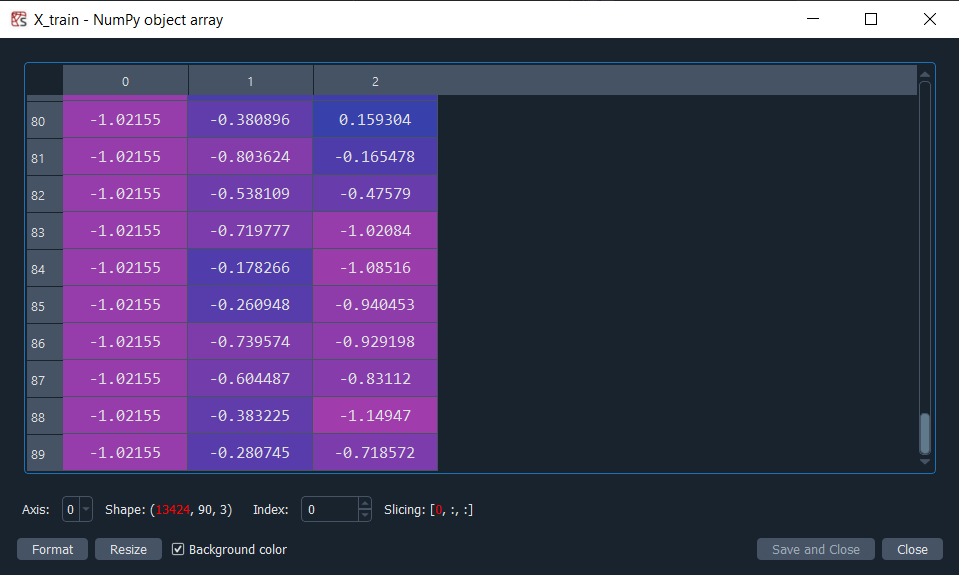

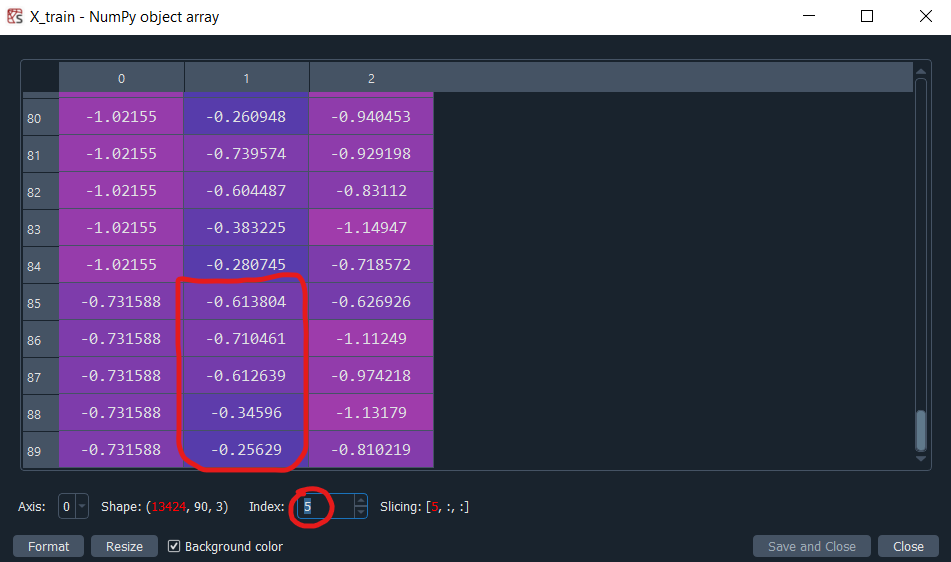

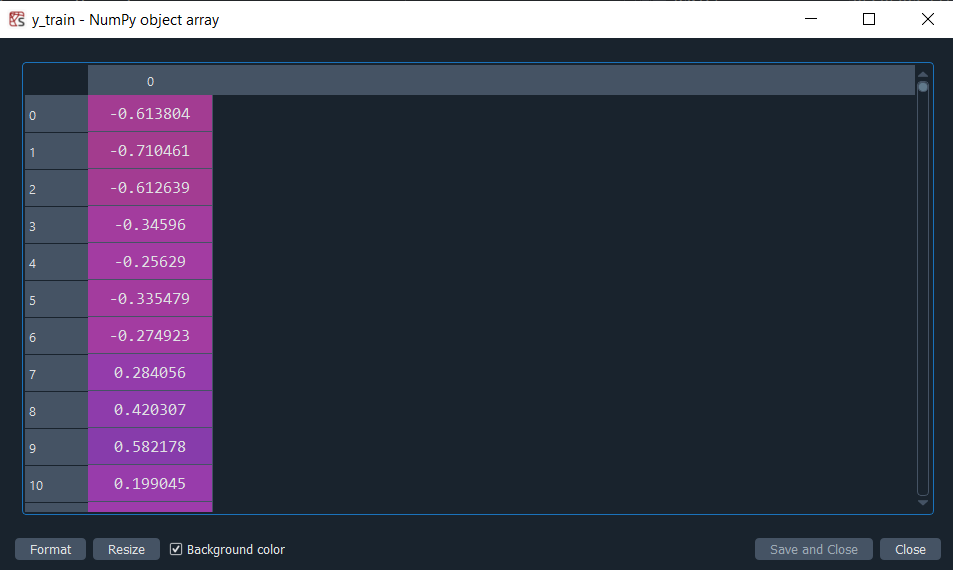

# CREACIÓN Y ENTRENAMIENTO DE LOS MODELOS + GRÁFICOS

In [31]:
# Importamos las librerías necesarias para todos los modelos
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, MaxPooling1D
from keras.layers import Dense, Dropout

import psutil #Para el monitoreo y registro de los recursos del equipo

## 1.1- CNN_mse (+ definición de funciones para el resto de modelos)

In [32]:
def model_CNN(metrica):
    model_CNN_mse = Sequential()
    model_CNN_mse.add(Conv1D(64, kernel_size=2, activation='relu', 
                     input_shape=(X_train.shape[1], X_train.shape[2])))
    model_CNN_mse.add(Flatten())
    model_CNN_mse.add(Dropout(0.2))
    model_CNN_mse.add(Dense(32, activation='relu'))
    model_CNN_mse.add(Dropout(0.2))
    model_CNN_mse.add(Dense(y_train.shape[1]))

    model_CNN_mse.compile(optimizer='adam', loss=metrica)
    model_CNN_mse.summary()
    
    return model_CNN_mse

In [33]:
model_CNN_mse = model_CNN('mse')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 89, 64)            448       
                                                                 
 flatten (Flatten)           (None, 5696)              0         
                                                                 
 dropout (Dropout)           (None, 5696)              0         
                                                                 
 dense (Dense)               (None, 32)                182304    
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 182,785
Trainable params: 182,785
Non-trai

#### Ajustamos el modelo con nuestros datos y comprobamos el training y validation loss

In [34]:
def train_model(model):
    cpu_before = psutil.cpu_percent() # Monitoreo del cpu
    memory_before = psutil.virtual_memory().percent # Monitoreo de la memoria

    history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1, verbose=1) #Entrenamiento modelo

    cpu_after = psutil.cpu_percent()
    memory_after = psutil.virtual_memory().percent

    print("Uso de CPU antes del entrenamiento:", cpu_before, "%")
    print("Uso de memoria antes del entrenamiento:", memory_before, "%")
    print("Uso de CPU después del entrenamiento:", cpu_after, "%")
    print("Uso de memoria después del entrenamiento:", memory_after, "%")

    return history

In [35]:
history_CNN_mse = train_model(model_CNN_mse)

Epoch 1/30
756/756 [==============================] - 3s 4ms/step - loss: 0.1764 - val_loss: 0.1244
Epoch 2/30
756/756 [==============================] - 2s 3ms/step - loss: 0.1264 - val_loss: 0.0912
Epoch 3/30
756/756 [==============================] - 2s 3ms/step - loss: 0.1184 - val_loss: 0.0836
Epoch 4/30
756/756 [==============================] - 3s 3ms/step - loss: 0.1123 - val_loss: 0.0702
Epoch 5/30
756/756 [==============================] - 3s 3ms/step - loss: 0.1134 - val_loss: 0.0834
Epoch 6/30
756/756 [==============================] - 2s 3ms/step - loss: 0.1097 - val_loss: 0.1059
Epoch 7/30
756/756 [==============================] - 2s 3ms/step - loss: 0.1093 - val_loss: 0.0698
Epoch 8/30
756/756 [==============================] - 2s 3ms/step - loss: 0.1103 - val_loss: 0.0826
Epoch 9/30
756/756 [==============================] - 2s 3ms/step - loss: 0.1094 - val_loss: 0.0754
Epoch 10/30
756/756 [==============================] - 2s 3ms/step - loss: 0.1071 - val_loss: 0.0699

In [41]:
def plot_loss(history_modelo):
    """Grafica las curvas de perdida de entrenamiento y validación. Usa como dato de entrada el histórico del modelo"""
    plt.plot(history_modelo.history['loss'], label='Training loss')
    plt.plot(history_modelo.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()

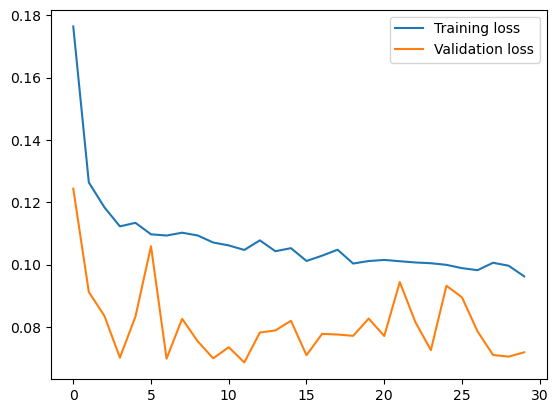

In [42]:
plot_loss(history_CNN_mse)

#### Para calcular el vector de predicciones, antes hay que darle la misma forma a X_test y ya servirá para el resto de modelos

In [38]:
index = dataset_test.index[0]  # Índice del primer registro de 2020
test_set = dataset.iloc[(index-n_past):, [2,4,5]].values
test_set_scaled = scaler.transform(test_set)
X_test = []

for i in range(n_past, len(test_set_scaled) - n_future +1):
    X_test.append(test_set_scaled[i - n_past:i, :])
    
X_test = np.array(X_test)

##### Calcular el vector de predicciones

In [92]:
def generate_forecast(model):
    """Calcula el vector de predicciones de X_test con respecto al modelo  model, dado como dato de entrada"""
    forecast_scaled = model.predict(X_test)
    forecast_scaled_copies = np.repeat(forecast_scaled, training_set.shape[1], axis=-1)
    forecast = scaler.inverse_transform(forecast_scaled_copies)[:, [1]]
    
    return forecast

In [43]:
forecast_CNN_mse = generate_forecast(model_CNN_mse)

35/35 [==============================] - 0s 2ms/step


#### Representación de resultados

In [62]:
# Librerías que usaremos para graficar
##from plotly.offline import init_notebook_mode
##init_notebook_mode(connected=True)
##import plotly.io as pio
##pio.renderers.default = 'notebook'

from plotly.offline import iplot
import plotly.graph_objects as go

In [91]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear la figura con subtramas
fig = make_subplots(rows=1, cols=1)

# Agregar la traza para los datos de forecast_CNN_mse y forecast_dates
fig.add_trace(go.Scatter(x=forecast_dates, y=forecast_CNN_mse.flatten(), mode='lines', name='Forecast CNN MSE'))

# Agregar la traza para los datos de real_values
fig.add_trace(go.Scatter(x=forecast_dates, y=real_values.flatten(), mode='lines', name='Real Values'))

# Personalizar el diseño de la gráfica
fig.update_layout(title='Forecast vs Real Values', xaxis_title='Fecha', yaxis_title='Valor')

# Mostrar la gráfica
fig.show()

In [86]:
forecast_CNN_mse_horizontal = np.squeeze(forecast_CNN_mse)
forecast_CNN_mse_horizontal

array([16.561476, 15.927429, 15.524138, ..., 16.468477, 16.946972,
       16.511139], dtype=float32)

In [90]:
real_values

array([[16.14],
       [15.9 ],
       [15.13],
       ...,
       [18.35],
       [17.9 ],
       [19.47]])